# Pre-Processing: Housing Price Predicition

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [3]:
data = pd.read_csv("Data Files/train_data_engineered.csv")

In [4]:
data.shape

(1137, 65)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1137 non-null   int64  
 1   LotFrontage    1137 non-null   float64
 2   LotArea        1137 non-null   int64  
 3   MasVnrArea     1137 non-null   float64
 4   BsmtFinSF1     1137 non-null   int64  
 5   BsmtUnfSF      1137 non-null   int64  
 6   TotalBsmtSF    1137 non-null   int64  
 7   1stFlrSF       1137 non-null   int64  
 8   2ndFlrSF       1137 non-null   int64  
 9   GrLivArea      1137 non-null   int64  
 10  BsmtFullBath   1137 non-null   int64  
 11  FullBath       1137 non-null   int64  
 12  HalfBath       1137 non-null   int64  
 13  BedroomAbvGr   1137 non-null   int64  
 14  TotRmsAbvGrd   1137 non-null   int64  
 15  Fireplaces     1137 non-null   int64  
 16  GarageCars     1137 non-null   int64  
 17  GarageArea     1137 non-null   int64  
 18  WoodDeck

In [6]:
data_num=data.select_dtypes(include=['int64','float64']).copy()
data_num = data_num.drop(columns=['MSSubClass','OverallQual','OverallCond'])
data_num.head()

,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MiscVal,House_Age,Remod_Age,Garage_Age
0,208500,65.0,8450,196.0,706,150,856,856,854,1710,...,8,0,2,548,0,61,0,18,0,18.0
1,181500,80.0,9600,0.0,978,284,1262,1262,0,1262,...,6,1,2,460,298,0,0,45,0,45.0
2,223500,68.0,11250,162.0,486,434,920,920,866,1786,...,6,1,2,608,0,42,0,20,19,20.0
3,250000,84.0,14260,350.0,655,490,1145,1145,1053,2198,...,9,1,3,836,192,84,0,21,0,21.0
4,307000,75.0,10084,186.0,1369,317,1686,1694,0,1694,...,7,1,2,636,255,57,0,17,16,17.0


In [10]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,65.0,8450,196.0,706,150,856,856,854,1710,...,0,0,0,0,1,0,0,0,1,0
1,181500,80.0,9600,0.0,978,284,1262,1262,0,1262,...,0,0,0,0,1,0,0,0,1,0
2,223500,68.0,11250,162.0,486,434,920,920,866,1786,...,0,0,0,0,1,0,0,0,1,0
3,250000,84.0,14260,350.0,655,490,1145,1145,1053,2198,...,0,0,0,0,1,0,0,0,1,0
4,307000,75.0,10084,186.0,1369,317,1686,1694,0,1694,...,0,0,0,0,1,0,0,0,1,0


In [11]:
data_encoded.shape

(1137, 223)

In [12]:
#reg=LinearRegression()
#reg.fit(X,y)
#prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

In [15]:
X=data_encoded.drop('SalePrice',axis=1)
y=data_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test,y_test)

0.8753885240391307

In [16]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)

C:\Users\nicho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14108534206.610657, tolerance: 467521470.4690409
  model = cd_fast.enet_coordinate_descent(


ValueError: x and y must have same first dimension, but have shapes (23,) and (222,)

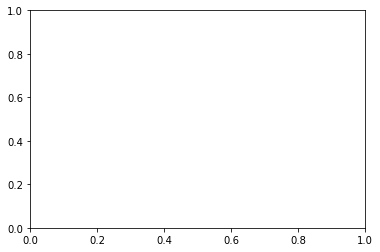

In [17]:
names = data_num.drop('SalePrice',axis=1).columns
lasso = Lasso(alpha=0.1, normalize=True)
lasso_coef = lasso.fit(X,y).coef_
_=plt.plot(range(len(names)), lasso_coef)
_=plt.xticks(range(len(names)), names, rotation=90)
_=plt.ylabel('Coefficients')
plt.show()